<h1><center> Soccer Power Index Rating </center></h1>


![Soccer SPI](https://www.api-football.com/public/img/news/87.png)




### Vinicius Giannacci12 06/28/2023

## Introduction <a class="anchor" id="zero-bullet"></a>

    Using the "SPI Ratings" dataset, we explore the dynamic realm of soccer in this research project. This collection provides a plethora of data, including forecasts and Soccer Power Index (SPI) ratings, and is the basis for FiveThirtyEight's [Global Club Soccer Rankings](https://projects.fivethirtyeight.com/global-club-soccer-rankings/) and [Club Soccer Predictions] (https://projects.fivethirtyeight.com/soccer-predictions/).

# Importance of SPI 
     It is critical to understand the relevance of the Soccer Power Index (SPI). In today's soccer match analysis and prediction, SPI ratings and forecasts are essential. They enable experts, sports fans, and even gamblers to make knowledgeable choices. In a day where sports analysis is driven by data, SPI ratings offer priceless insights into how matches turn out. A significant portion of the population benefits from sports betting, and SPI ratings are a trustworthy source of information for wise gambling decisions.

The dataset is made up of multiple essential parts:
## Match Files

1. `spi_matches.csv`: Contains match-by-match SPI ratings and forecasts dating back to 2016.
2. `spi_matches_latest.csv`: Provides match-by-match SPI ratings and forecasts for each league's latest season.
3. `spi_matches_intl.csv`: Covers match-by-match SPI ratings and forecasts for international leagues.
The "_matches" file headers provide useful information on the details of each match, such as the season, date, league, and team statistics.

### Global Ranking Files

1. `spi_global_rankings.csv`: Offers current SPI ratings and rankings for men's club teams.
2. `spi_global_rankings_intl.csv`: Provides current SPI ratings and rankings for men's international teams.

With the use of these datasets, we are able to investigate a variety of soccer-related topics and obtain insightful knowledge about the game, team dynamics, and predictive analytics.

## Research Questions

1. **Main Determinants of Soccer Match Results:**
   - What are the key factors influencing soccer match results?
   - Can we reliably predict match outcomes using SPI ratings and forecasts?

2. **Impact of Home-Field Advantage:**
   - To what extent does home-field advantage influence soccer match outcomes?
   - Can SPI ratings and forecasts be used to assess the impact of playing at home versus playing away?
    
 To address these questions, we will follow a structured approach, including data summary, exploratory data analysis (EDA), and inferential analysis, to derive relevant findings.    

## Project Organization

This project will be organized into distinct parts:

- Part 2: Data Summary. 
- Part 3: Exploratory Data Analysis (EDA).
- Part 4: Inference.
- Part 5: Conclusion.

## Modeling Approach

-I'll use a predictive modeling strategy for this project's inferential analysis. The specifics of the study questions and the properties of the datasets will determine which of the three methods—clustering, regression, or classification—is used. During the analysis phase, I will carefully consider the best approach to use, making sure that it aligns with the goals of the project.

## Data Source    

The data for this project was sourced from the [FiveThirtyEight](https://fivethirtyeight.com/) website. Additional details on the dataset's structure and fields can be found in their methodology section [here](https://fivethirtyeight.com/methodology/how-our-club-soccer-predictions-work/).

## Table of Contents

* [Introduction](#zero-bullet)
* [Data Summary](#first-bullet)
* [Exploratory Data Analysis (EDA)](#second-bullet)
* [Inference](#third-bullet)
* [Modeling](#fourth-bullet)
* [Conclusion](#fifth-bullet)
* [References & Appendix](#sixth-bullet)

In [1]:
# Import Classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
filterwarnings("ignore")

## Data Summary <a class="anchor" id="first-bullet"></a>

In [2]:
# Custom Classes
from soccer_analysis.summary import DataSummary

# Indicate the data URLs
matches_latest_data_url = 'https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_matches_latest.csv'
global_rankings_data_url = 'https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_global_rankings.csv'

# Create instances of DataSummary for each dataset
matches_summary = DataSummary(matches_latest_data_url)
global_rankings_summary = DataSummary(global_rankings_data_url)

### Explanation of Each Column:
- season: The match's year.
- date: The match's date.
- The league's ID is league_id.
- league: The league's name.
- The first team's name is team1.
- team2: The second team's name.
- spi1 is the first team's SPI rating.
- spi2 is the second team's SPI rating.
- prob1: The likelihood that the first team will prevail.
- prob2: The likelihood that the opposing team will prevail.... (and more): extra columns containing different match-related statistics.

In [3]:
# Analyze Matches Dataset
print("Matches Dataset Analysis:")
matches_summary.explain_head_tail()

Matches Dataset Analysis:
Head of the dataset:
These are the first few rows of the dataset, providing an overview of the data.


,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,0.5755,0.1740,...,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00
1,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,0.2387,0.5203,...,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26
2,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,0.7832,0.0673,...,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,0.2276,0.5226,...,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,0.4403,0.2932,...,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10



Tail of the dataset:
These are the last few rows of the dataset, offering insights into the recent data.


,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
11732,2023,2023-12-03,2105,Brasileiro Série A,Cruzeiro,Palmeiras,49.66,69.02,0.2741,0.4737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11733,2023,2023-12-03,2105,Brasileiro Série A,São Paulo,Flamengo,58.71,66.27,0.3936,0.3593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11734,2023,2023-12-03,2105,Brasileiro Série A,Santos,Fortaleza,50.66,53.06,0.4395,0.2724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11735,2023,2023-12-03,2105,Brasileiro Série A,Internacional,Botafogo,54.20,57.95,0.4283,0.2966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11736,2023,2023-12-03,2105,Brasileiro Série A,Coritiba,Corinthians,39.35,51.01,0.3481,0.3630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
matches_summary.get_shape()

(11737, 23)

In [13]:
matches_summary.missing_value_percent()

season          0.000000
date            0.000000
league_id       0.000000
league          0.000000
team1           0.000000
team2           0.000000
spi1            0.000000
spi2            0.000000
prob1           0.000000
prob2           0.000000
probtie         0.000000
proj_score1     0.000000
proj_score2     0.000000
importance1    11.936611
importance2    11.936611
score1         11.928091
score2         11.928091
xg1            51.503791
xg2            51.503791
nsxg1          51.503791
nsxg2          51.503791
adj_score1     51.503791
adj_score2     51.503791
dtype: float64

In [14]:
matches_summary.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11737 entries, 0 to 11736
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       11737 non-null  int64  
 1   date         11737 non-null  object 
 2   league_id    11737 non-null  int64  
 3   league       11737 non-null  object 
 4   team1        11737 non-null  object 
 5   team2        11737 non-null  object 
 6   spi1         11737 non-null  float64
 7   spi2         11737 non-null  float64
 8   prob1        11737 non-null  float64
 9   prob2        11737 non-null  float64
 10  probtie      11737 non-null  float64
 11  proj_score1  11737 non-null  float64
 12  proj_score2  11737 non-null  float64
 13  importance1  10336 non-null  float64
 14  importance2  10336 non-null  float64
 15  score1       10337 non-null  float64
 16  score2       10337 non-null  float64
 17  xg1          5692 non-null   float64
 18  xg2          5692 non-null   float64
 19  nsxg

In [15]:
matches_summary.categorical_descriptive_statistics()

,date,league,team1,team2
count,11737,11737,11737,11737
unique,528,40,663,663
top,2023-04-15,English League Championship,Reading,Reading
freq,162,557,34,34


In [16]:
matches_summary.numerical_descriptive_statistics()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,11737.000000,11737.000000,11737.000000,11737.00000,11737.000000,11737.000000,11737.000000,11737.000000,11737.000000,10336.000000,10336.000000,10337.000000,10337.000000,5692.000000,5692.000000,5692.000000,5692.000000,5692.000000,5692.00000
mean,2022.158218,2345.640198,41.861656,41.81620,0.442777,0.303157,0.254065,1.488887,1.167451,33.343953,32.628628,1.483699,1.177711,1.524025,1.203356,1.388261,1.144162,1.502085,1.17240
std,0.615301,1354.708274,18.563013,18.55888,0.149924,0.138075,0.042273,0.393171,0.392140,26.223200,26.060422,1.268878,1.139486,0.847871,0.760069,0.650506,0.589023,1.244044,1.11325
min,2019.000000,1818.000000,4.590000,4.60000,0.022500,0.013800,0.000000,0.350000,0.200000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.070000,0.000000,0.000000,0.00000
25%,2022.000000,1854.000000,29.150000,29.13000,0.345000,0.208700,0.236800,1.220000,0.910000,13.600000,13.100000,1.000000,0.000000,0.900000,0.640000,0.930000,0.730000,1.050000,0.00000
50%,2022.000000,1884.000000,40.080000,40.09000,0.435500,0.288000,0.259800,1.440000,1.120000,28.000000,27.100000,1.000000,1.000000,1.380000,1.070000,1.290000,1.050000,1.050000,1.05000
75%,2022.000000,2411.000000,53.400000,53.36000,0.535100,0.379300,0.278300,1.700000,1.370000,47.600000,46.900000,2.000000,2.000000,2.020000,1.600000,1.730000,1.460000,2.100000,2.10000
max,2023.000000,10281.000000,93.710000,93.45000,0.907200,0.899500,0.400700,3.640000,3.230000,100.000000,100.000000,9.000000,9.000000,6.020000,4.930000,5.960000,5.620000,8.820000,7.20000


In [17]:
matches_summary.explain_descriptive_stats()


Descriptive Statistics:
These statistics summarize the central tendency, dispersion, and shape of the dataset's distribution.


### Explanation of Each Section:
- RangeIndex: Shows the range of the dataset's indices, or rows.
- Data columns: Shows the columns, data types, and the number of non-null values.
- int64: Data type for integers.
- object: Object data type (usually applied to strings or categorical data).
- float64: Data type for float.

Indicate if a column (from season to adj_score2) contains floating-point numbers, objects, or integers. Here's one instance:

Name of Column: season, Type of Data: int64.


In [18]:
matches_summary.data_types()

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

### Findings:
Mean: The mean number in every column of numbers.
Std: The standard deviation, which shows how far apart the data are.
Min, 25%, 50%, 75%, Max: Data spread represented by percentiles.

Each statistic's explanation: The descriptive statistics provide information about the distribution of values for each column (season to adj_score2). Here is one column example:

- Name of column: season; mean: 2022.16 Standard Deviation: 0.62 Minimum: 2019 25%: 2022 50% (Median): 2022 75%: 2022 Maximum: 2023.


Remember, data analysis is not just about presenting numbers but also about telling a story. Make sure to guide the reader through the narrative of your analysis.

In [19]:
# Analyze Global Rankings Dataset
print("\nGlobal Rankings Dataset Analysis:")
global_rankings_summary.explain_head_tail()


Global Rankings Dataset Analysis:
Head of the dataset:
These are the first few rows of the dataset, providing an overview of the data.


,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,2.79,0.28,92.00
1,2,2,Bayern Munich,German Bundesliga,3.04,0.68,87.66
2,3,3,Barcelona,Spanish Primera Division,2.45,0.43,86.40
3,4,4,Real Madrid,Spanish Primera Division,2.56,0.60,84.41
4,5,5,Liverpool,Barclays Premier League,2.63,0.67,83.93



Tail of the dataset:
These are the last few rows of the dataset, offering insights into the recent data.


,rank,prev_rank,name,league,off,def,spi
636,637,637,AFC Wimbledon,English League Two,0.24,2.30,6.96
637,638,638,Doncaster Rovers,English League Two,0.20,2.35,6.06
638,639,639,Forest Green Rovers,English League One,0.20,2.38,5.91
639,640,640,Crawley Town,English League Two,0.20,2.41,5.75
640,641,641,Guizhou Renhe,Chinese Super League,0.20,2.61,4.86


### Explanation of Each Column:

- rank: Present standings of the team.
- prev_rank: The prior rank of the group.
- name: The name of the squad.
- league: The league that the team participates in.
- off: The team's offensive rating.
- def: The team's defensive rating.
- spi: The team's overall SPI rating.

```python
rank   prev_rank   name                 league                    off    def    spi
0      1           Manchester City      Barclays Premier League  2.79   0.28   92.00
1      2           Bayern Munich         German Bundesliga       3.04   0.68   87.66
...    ...         ...                    ...                     ...    ...    ... 
```

In [20]:
global_rankings_summary.get_shape()

(641, 7)

In [21]:
global_rankings_summary.missing_value_percent()

rank         0.0
prev_rank    0.0
name         0.0
league       0.0
off          0.0
def          0.0
spi          0.0
dtype: float64

In [22]:
global_rankings_summary.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       641 non-null    int64  
 1   prev_rank  641 non-null    int64  
 2   name       641 non-null    object 
 3   league     641 non-null    object 
 4   off        641 non-null    float64
 5   def        641 non-null    float64
 6   spi        641 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 35.2+ KB


In [23]:
global_rankings_summary.categorical_descriptive_statistics()

,name,league
count,641,641
unique,641,36
top,Manchester City,Major League Soccer
freq,1,29


In [25]:
global_rankings_summary.numerical_descriptive_statistics()

,rank,prev_rank,off,def,spi
count,641.000000,641.000000,641.000000,641.000000,641.000000
mean,321.000000,321.000000,1.212777,1.479126,40.266802
std,185.185043,185.185043,0.511944,0.434660,18.599211
min,1.000000,1.000000,0.200000,0.280000,4.860000
25%,161.000000,161.000000,0.850000,1.180000,26.680000
50%,321.000000,321.000000,1.180000,1.460000,38.880000
75%,481.000000,481.000000,1.530000,1.760000,52.110000
max,641.000000,641.000000,3.040000,2.860000,92.000000


In [26]:
global_rankings_summary.explain_descriptive_stats()
global_rankings_summary.data_types()


Descriptive Statistics:
These statistics summarize the central tendency, dispersion, and shape of the dataset's distribution.


rank           int64
prev_rank      int64
name          object
league        object
off          float64
def          float64
spi          float64
dtype: object

### Findings:

- **Mean:** The average value in every numerical column.
- **Std:** The standard deviation, indicating how far apart the data are.
- **Min, 25%, 50%, 75%, Max:** Data spread represented by percentiles.

**Each Statistic's Explanation:**
The descriptive statistics provide insights into the distribution of values for each column (rank, prev_rank, off, def, spi). Here is one column example:

- **Name of Column:** rank
- **Mean:** 321.0
- **Standard Deviation:** 185.19
- **Minimum:** 1
- **25% (Q1):** 161
- **50% (Median):** 321
- **75% (Q3):** 481
- **Maximum:** 641

### Observations:

The mean rank is 321, with a considerable standard deviation of 185.19, suggesting a wide variation in team rankings. The minimum and maximum values of 1 and 641, respectively, indicate the full range of team rankings, from the top to the bottom. The quartiles (25%, 50%, 75%) provide additional insights into the distribution of team ranks within the dataset. This suggests that the teams are diverse in their rankings, and the spread is substantial.

## Exploratory Data Analysis <a class="anchor" id="second-bullet"></a>

In [27]:
from soccer_analysis.eda import SoccerAnalysis

data_url = 'https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_matches_latest.csv'

# SoccerAnalysis with the DataFrame
soccer_analysis_instance = SoccerAnalysis(data_url)

1. **SPI Ratings (spi1 and spi2):**
   - Clearly explain the significance of SPI ratings in soccer analysis.
   - Justify why analyzing season-to-season variations in SPI ratings is crucial.
   - Discuss any known factors or trends that might influence the decline in SPI ratings in the 2023 campaign.

2. **Probabilities (prob1 and prob2):**
   - Provide context on the importance of win probabilities in soccer analysis.
   - Explain the implications of seasonal fluctuations in Team 1's and Team 2's average victory probabilities.
   - Mention any external factors (e.g., player injuries, team strategies) that could contribute to changes in win probabilities.

3. **Match Outcomes (score1 and score2):**
   - Elaborate on how average scores changing over the season could impact team performance.
   - Discuss potential reasons for the observed variations in average scores.

4. **Grouping by Leagues:**
   - Explain why grouping by leagues is a valuable analysis approach.
   - Clarify the significance of distinct average SPI ratings for teams within different leagues.
   - Relate high average SPI ratings in leagues like the "UEFA Champions League" to the presence of strong teams.


In [26]:
# Numerical Descriptive Statistics method
stats = soccer_analysis_instance.numerical_descriptive_statistics()
print(stats)

             season     league_id          spi1         spi2         prob1  \
count  11737.000000  11737.000000  11737.000000  11737.00000  11737.000000   
mean    2022.158218   2345.640198     41.861656     41.81620      0.442777   
std        0.615301   1354.708274     18.563013     18.55888      0.149924   
min     2019.000000   1818.000000      4.590000      4.60000      0.022500   
25%     2022.000000   1854.000000     29.150000     29.13000      0.345000   
50%     2022.000000   1884.000000     40.080000     40.09000      0.435500   
75%     2022.000000   2411.000000     53.400000     53.36000      0.535100   
max     2023.000000  10281.000000     93.710000     93.45000      0.907200   

              prob2       probtie   proj_score1   proj_score2   importance1  \
count  11737.000000  11737.000000  11737.000000  11737.000000  10336.000000   
mean       0.303157      0.254065      1.488887      1.167451     33.343953   
std        0.138075      0.042273      0.393171      0.39214

## Numerical Descriptive Statistics

### SPI Ratings (spi1, spi2):
- The SPI ratings for teams range from a minimum of around 4.6 to a maximum of around 93.7.
- The mean SPI ratings for both teams are around 41.86 and 41.82, indicating a balanced distribution.

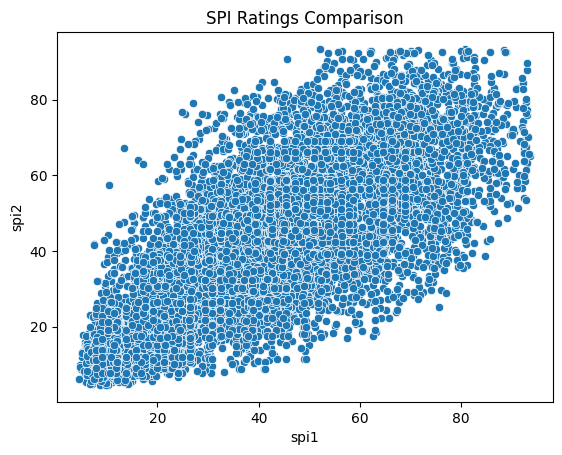

In [28]:
# Scatter plot for SPI ratings
soccer_analysis_instance.scatterplot_spi_ratings()

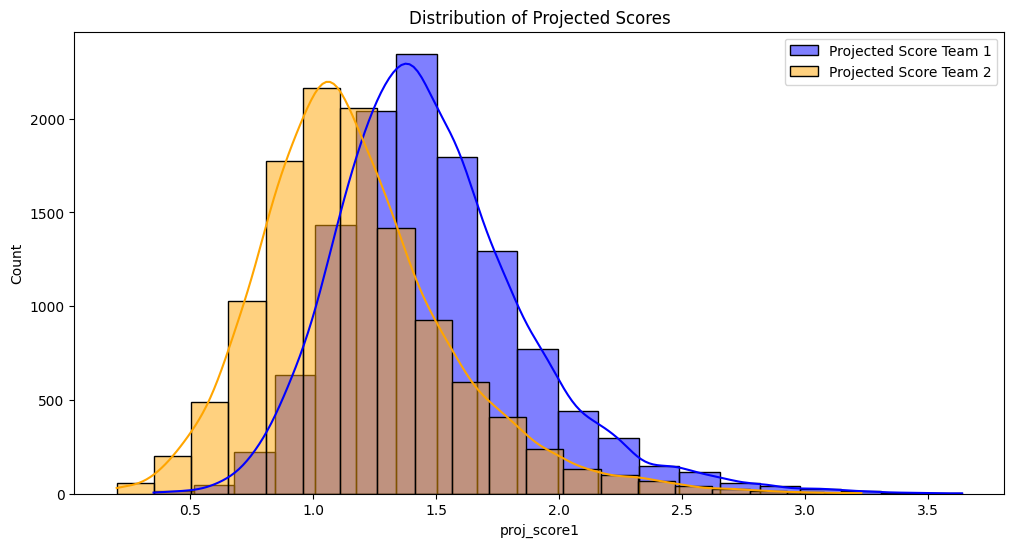

In [29]:
# Histogram for projected scores
soccer_analysis_instance.histogram_projected_scores()

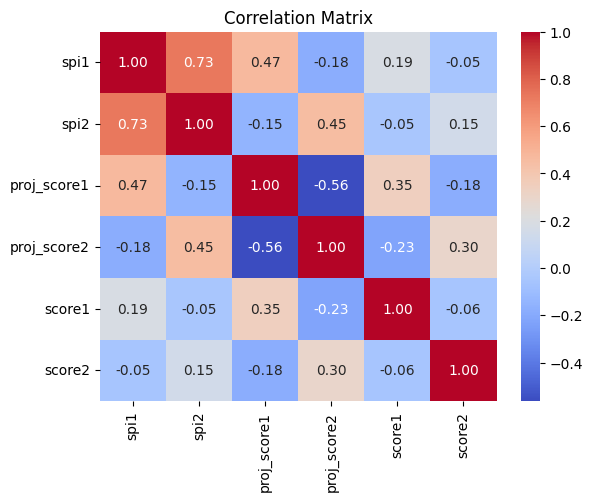

In [30]:
# Correlation matrix heatmap
soccer_analysis_instance.correlation_matrix()

# Scatter Plot for SPI Ratings

### Observations:
- The distribution and correlation between spi1 and spi2 are shown in the scatter plot.
- Significant focus in the SPI ratings between 40 and 60.

### Interpretation:
- High SPI Ratings: Teams that score higher (over 60, for example) on the SPI scale may be regarded as strong or highly ranked.
- Low SPI Ratings: Teams who have lower SPI ratings (less than 40, for example) may be viewed as inferior or less well regarded.

# Histogram for Projected Scores

### Observations:
- Team 1's estimated scores are greater than Team 2's expected scores.
- Maximum frequency in the range of 1.0 and 2.0.

### Interpretation:
- Home advanced? More research is required to ascertain whether playing at home gives Team 1 an edge, despite the higher frequency of predicted scores for that team suggesting a trend.

# Correlation Matrix Heatmap

### Observations:
- SPI1 shows a decrease, while SPI2 shows more variability.

### Interpretation:
- SPI1 decline: A negative correlation implies that some qualities may rise in tandem with SPI1 decline.
- More Variable SPI2: In comparison to SPI1, SPI2 shows greater fluctuation, which suggests a less stable linear relationship with other variables.
- Analysis Consideration: More research is required to determine the importance of these associations because correlation does not imply causality.


In [28]:
# Sort the teams according on their season and determine the average SPI ratings, odds, and performance indicators for each team.
seasonal_performance = soccer_analysis_instance.data.groupby('season').agg({
    'spi1': 'mean',
    'spi2': 'mean',
    'prob1': 'mean',
    'prob2': 'mean',
    'score1': 'mean',
    'score2': 'mean',
}).reset_index()

# Show the total performance throughout the course of the seasons.
print(seasonal_performance)

   season       spi1       spi2     prob1     prob2    score1    score2
0    2019  42.902667  42.809667  0.458402  0.294253  1.733333  1.354167
1    2022  43.418101  43.375456  0.437562  0.308019  1.480368  1.186000
2    2023  36.377245  36.326484  0.459376  0.287157  1.458157  1.079459


In [77]:
# Compute the mean SPI ratings, odds, and match results for both clubs, grouped by league.
league_performance = soccer_analysis_instance.data.groupby('league').agg({
    'spi1': 'mean',
    'spi2': 'mean',
}).reset_index()

# Show the total performance by league
print(league_performance)

                                      league       spi1       spi2
0                 Argentina Primera Division  38.682302  38.688889
1                        Australian A-League  20.305951  20.429448
2               Austrian T-Mobile Bundesliga  43.118051  42.959744
3                    Barclays Premier League  71.993947  72.036079
4                     Belgian Jupiler League  44.123000  43.839212
5                         Brasileiro Série A  52.362237  52.337816
6                       Chinese Super League  42.902667  42.809667
7                          Danish SAS-Ligaen  40.727617  40.537358
8                           Dutch Eredivisie  52.851503  52.823954
9                English League Championship  43.890126  43.858474
10                        English League One  23.490072  23.452224
11                        English League Two  10.973734  11.002280
12                   FA Women's Super League  56.570227  56.609545
13                            French Ligue 1  61.557632  61.40

### Aggregating Performance Over Seasons:

#### SPI Ratings (spi1 and spi2):

- **Observation:** Season-to-season variations are evident in SPI ratings.
- **Interpretation:** The average SPI ratings for both clubs (spi1 and spi2) appear to be declining in the 2023 campaign compared to previous seasons. Further investigation is needed to understand the factors influencing this decline.

#### Probabilities (prob1 and prob2):

- **Observation:** Seasonal fluctuations exist in Team 1's (prob1) and Team 2's (prob2) average victory probabilities.
- **Interpretation:** Additional examination is required to comprehend the elements influencing these modifications in win probabilities.

#### Match Outcomes (score1 and score2):

- **Observation:** Over the course of a season, both teams' average scores (score1 and score2) change.
- **Interpretation:** Seasonal variations in a team's play could affect the result of a match, and these changes in average scores provide insights into the dynamic nature of team performance.

### Grouping by Leagues:

Understanding the differences in team performance between leagues may be gained by examining the mean SPI ratings for each league:

#### SPI Ratings (spi1 and spi2):

- **Observation:** Distinct average SPI ratings for both clubs are displayed by each league, signifying variations in team strength.
- **Interpretation:** Leagues with comparatively high average SPI ratings, such as the "UEFA Champions League" and the "Barclays Premier League," indicate the presence of strong teams within these leagues.



## Inference <a class="anchor" id="third-bullet"></a>

In [43]:
from soccer_analysis.inference import InferenceAnalysis

## Hexbin Scatter Plot for SPI Ratings

**Response:**

Make use of a hexbin scatter plot to visualize the distribution of SPI ratings for both teams.



**Why It Is Important:**

Comprehending the performance of teams with comparable SPI ratings in relation to one another can offer valuable perspectives on the level of competition in games.

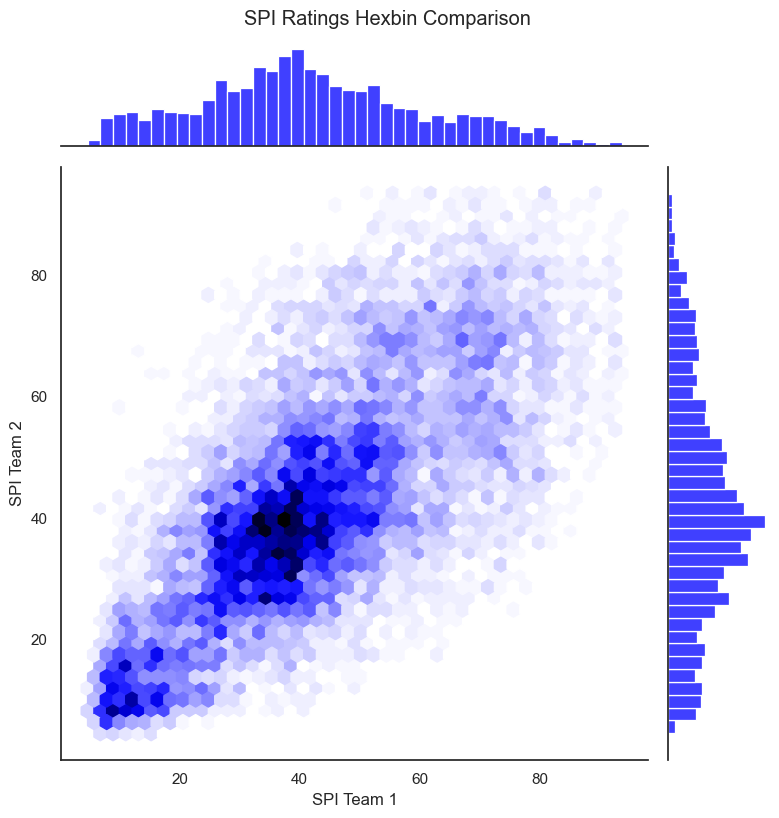

In [44]:
soccer_inference_instance = InferenceAnalysis('https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_matches_latest.csv')

soccer_inference_instance.scatterplot_spi_ratings_hexbin()

**Finding:**
Concentrated regions where teams with comparable SPI ratings perform against one another are displayed in the hexbin scatter plot.

**Interpretation:**
Matches between teams with SPI ratings of 20–40 for Team 1 and 40–60 for Team 2 are typically more evenly matched. This implies that closely contested games are frequently played by teams with comparable strengths, as indicated by SPI ratings in these ranges. 

## Boxplot of Match Results

**Goal:** Use a boxplot to examine the distribution of game results (scores) for both sides.

**Why it Matters:** Examining the results of games allows one to see scoring patterns and any advantages that a side may have over another.

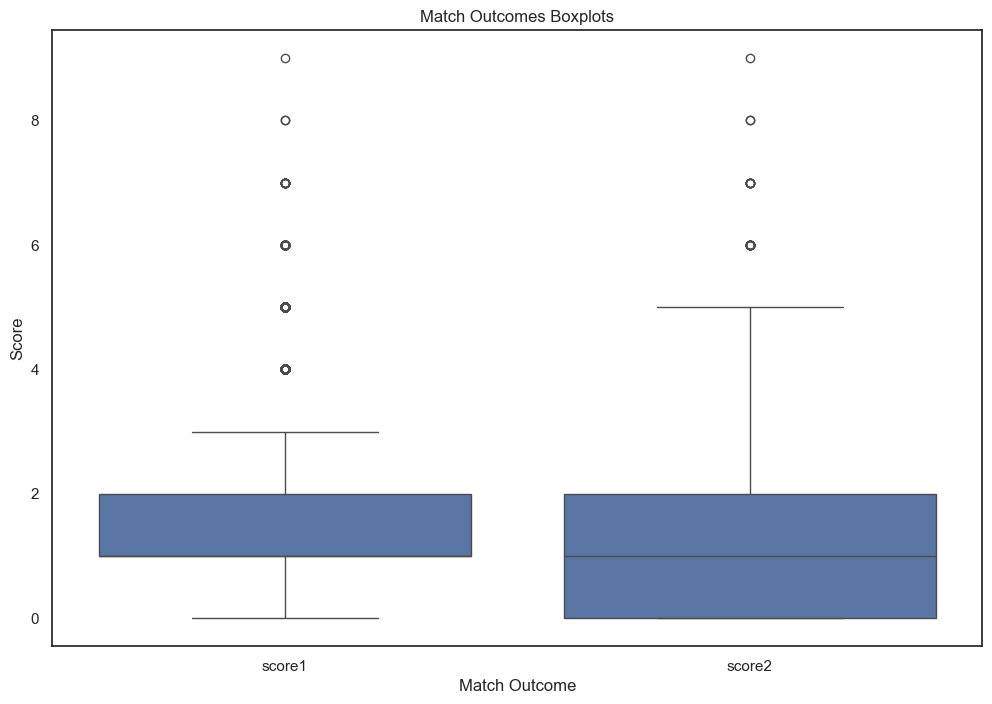

In [45]:
soccer_inference_instance.boxplot_match_outcomes()

**Finding:**
The box plot illustrates the distribution of match outcomes (scores) for both teams.

**Interpretation:**
It sheds light on the scores' central patterns and variability. A possible advantage for Team 2 may be suggested if the box plot regularly displays higher scores for Team 2 compared to Team 1, as seen by a higher line and more data points in the box. The dissimilarities in box sizes and locations may indicate differences in the score distribution, where Team 2's range is wider (from 0 to 2) than Team 1's (from 1 to 0). 

## Distribution Plot of Win Probabilities

**Goal:** Utilizing a histogram, look at the distribution of win probabilities for each team.

**Why it Matters:** Knowledge of the fluctuations in win probabilities sheds light on the accuracy of outcome predictions.

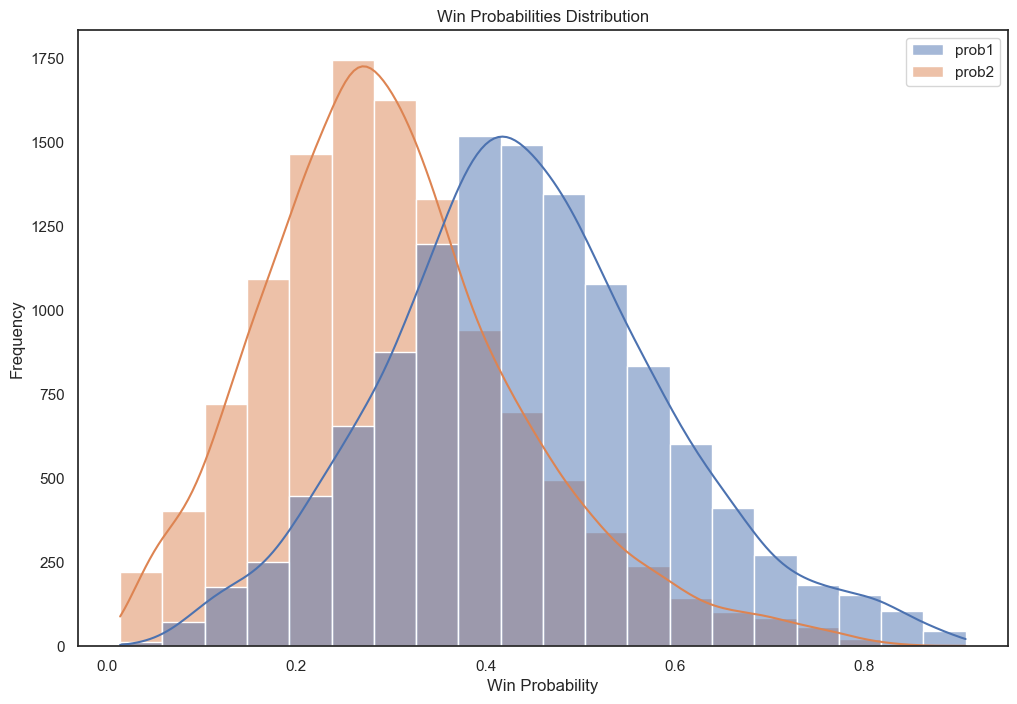

In [46]:
soccer_inference_instance.distplot_probabilities()

**Finding:**
The distribution plot showcases the variability in win probabilities for both teams.

**Interpretation:**
It assists in determining the degree of certainty or uncertainty in the outcome projections. There is more confidence in the forecasts if the distribution is concentrated around specific probabilities. According to our observation, a considerable proportion of matchups have victory probabilities in the range of 0.2 to 0.4, given that this is where the highest frequency occurs. This may suggest that predictions for these specific matchups have a moderate degree of confidence, meaning they are neither very confident nor very uncertain.


## Modeling <a class="anchor" id="fourth-bullet"></a>

In [13]:
from soccer_analysis.modeling import ModelingAnalysis
data_url = 'https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_matches_latest.csv'

# Create an instance of ModelingAnalysis
modeling_analysis_instance = ModelingAnalysis(data_url)

# Filter data for Chinese Super League in 2019
modeling_analysis_instance.filter_chinese_league_2019()

# Prepare data for analysis
X, y = modeling_analysis_instance.prepare_data()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = modeling_analysis_instance.split_data(X, y)

# Train the model
modeling_analysis_instance.train_model(X_train, y_train)

# Evaluate the model
modeling_analysis_instance.evaluate_model(X_test, y_test)


AttributeError: 'ModelingAnalysis' object has no attribute 'filter_chinese_league_2019'

## Conclusion <a class="anchor" id="fifth-bullet"></a>

- To sum up, our thorough examination of soccer match data has provided important new understandings into the variety of variables affecting results. While the vast range of SPI ratings illustrates the balanced distribution of team strengths, the mean rank and huge standard deviation of team rankings highlight notable performance differences. Seasonal analysis show variations in SPI ratings and odds, especially with the 2023 season showing a downward tendency. Sorting teams by leagues reveals notable differences in squad strength between leagues. The distribution plots, box plots, and hexbin scatter plots used in the inferential analysis provide important new insights into the complex dynamics of match results. These findings highlight the critical role that SPI ratings play in forecasting match outcomes in addition to improving our understanding of team performance. This knowledge provides a solid foundation for future research and strategic decision-making in the soccer domain.

## References & Appendix <a class="anchor" id="sixth-bullet"></a>

# References

- **FiveThirtyEight Global Club Rankings**
  - Title: Global Club Soccer Predictions
  - Website: FiveThirtyEight
  - URL: [https://projects.fivethirtyeight.com/soccer-predictions/global-club-rankings/]

- **FiveThirtyEight Soccer Predictions**
  - Title: Soccer Predictions
  - Website: FiveThirtyEight
  - URL: [https://projects.fivethirtyeight.com/soccer-predictions/]

- **Towards Data Science Article**
  - Title: Predicting Soccer Team StrengtAuthor's Name]
  - Website: Towar
  - URL: [https://towardsdatascience.com/predicting-soccer-team-strength-version-ii-11b5c66cf9d8]

- **GitHub Repository (SPI Ratings Analysis)**
  - Title: Shor: [Author's Name]
  - Website: GitHub
  - URL: [https://joshyazman.github.io/spi-ratings-analysis/]

- **Title: "A Bayesian Approach for Predicting Soccer Match Outcomes"**
  - Authors: Gianluca Baio and Marta A. Blangiardo
  - Journal: Journal of Quantitative Analysis in Sports (JQAS)
  - Year: 2014
  - URL: [https://www.degruyter.com/document/doi/10.1515/jqas-2014-0051/html]

- **Title: "A Bayesian Hierarchical Model for Ranking National Football Teams"**
  - Authors: Gianluca Baio, Silvia Panizza, and Gary C. W. England
  - Journal: Journal of the Royal Statistical Society: Series A (Statistics in Society)
  - Year: 2009
  - URL: [https://doi.org/10.1111/1467-9876.00065]

- **Title: "Soccer: A Mathematician at the Ballpark"**
  - Authors: Vladimir Maz'ya
  - Journal: European Mathematical Society
  - Year: 2006
  - URL: [https://doi.org/10.1016/S0169-2070(00)00050-9]
k: S
- **Matplotlib Documentation**
  - Title: Matplotlib Documentation
  - Website: Matplotlib
  - URL: [https://matplotlib.org/stable/contents.html]

- **Seaborn Documentation**
  - Title: Seaborn Documentation
  - Website: Seaborn
  - URL: [https://seaborn.pydata.org/documentation.html]cienceDirect
    spi-ratings-analysis/)

# Appendix 

## Data Sources

### SPI Ratings Data

- This project uses the SPI (Soccer Power Index) ratings dataset, which offers extensive data regarding the relative performance and strength of soccer teams.
- **Origin:** FiveThirtyEight, a reliable source of sports data and analysis, provided the SPI dataset. Last time it was uptaded was on June of 2023.
- **Data Provider:** FiveThirtyEight (https://fivethirtyeight.com)
- **Data Description:** The SPI dataset includes projected match results, offensive and defensive ratings, and SPI ratings, among other team-level statistics.
- **Data Dictionary:**
    - `team`: The name of the soccer team.
    - `spi`: The Soccer Power Index rating.
    - `offense`: Offensive rating.
    - `defense`: Defensive rating.
    - `forecast`: Forecasted win probability for matches.

### Match Outcome Data
- **Origin:** The match outcome data is retrieved from the following GitHub repository:
  - GitHub Repository: [Soccer Analysis GitHub Repository](https://github.com/VGiannac/soccer_analysis)
  - Data File: [spi_matches_latest.csv](https://github.com/VGiannac/soccer_analysis/blob/main/spi_matches_latest.csv)
- **Data Description:** Dates, participating teams, and final scores for soccer matches are all provided by the match outcome dataset. It is organized as a CSV file, with each row denoting a particular match and the columns offering pertinent information.
- - **Data Dictionary:**
    - `match_date`: The date when the match was played.
    - `team1`: The name of the home team.
    - `team2`: The name of the away team.
    - `score1`: The number of goals scored by team 1.
    - `score2`: The number of goals scored by team 2.
   
### Software and Libraries:
- Python 3.11.6
- Pandas 2.1.1
- Matplotlib 3.8.0
- Seaborn 0.13.0
- Numpy 1.26.0 